In [2]:
import pyspark
import pyspark.sql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

from pyspark.sql.functions import col

from pyspark.sql.types import *

In [3]:
movies = pd.read_csv('movie.csv')

In [4]:
import re
def correct_title(title):
    match = re.match(r'^(.*), The \((\d{4})\)$', title)
    if match:
        movie_name = match.group(1)
        year = match.group(2)
        return f'The {movie_name} ({year})'
    else:
        return title

In [5]:
movies['title'] = movies['title'].apply(correct_title)

In [6]:
movies.shape

(27278, 3)

In [7]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
top_50_movies = popular_df.head(50)

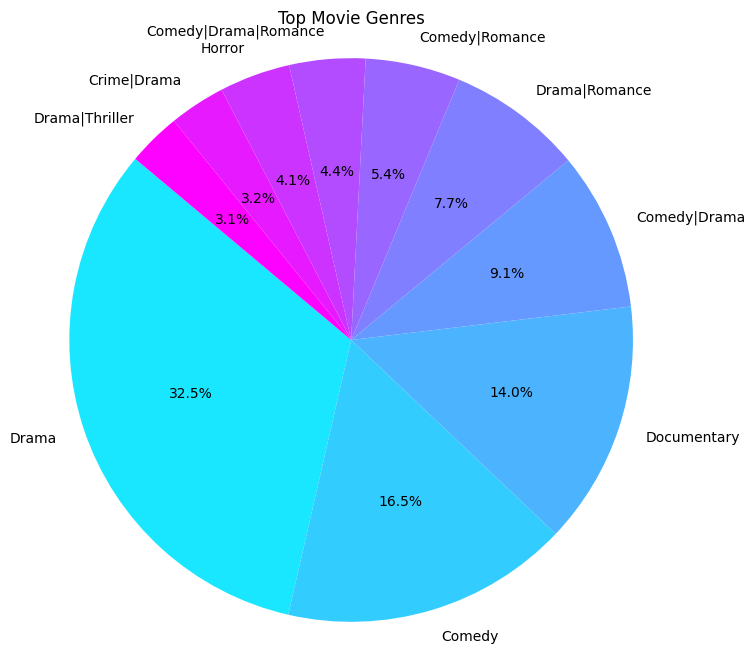

In [8]:
import seaborn as sns

# Define the color palette
a = plt.cm.cool

# Your code snippet
top_genres = movies['genres'].explode().value_counts().head(10)
colors = [a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.9), a(0.99)]

# Create a pie chart with the specified colors
plt.figure(figsize=(8, 8))
plt.pie(top_genres.values, labels=top_genres.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()